In [1]:
from tfcomb import CombObj
C = CombObj()

In [2]:
#Data input for TF_COMB oject
C.TFBS_from_motifs(regions="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/enhancers/CD4+_enhancers.bed",
                   motifs="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/hg19_masked.fa",
                   threads=4)

INFO: Scanning for TFBS with 4 thread(s)...
INFO: Progress: 11%
INFO: Progress: 20%
INFO: Progress: 28%
INFO: Progress: 36%
INFO: Progress: 45%
INFO: Progress: 55%
INFO: Progress: 65%
INFO: Progress: 74%
INFO: Progress: 82%
INFO: Progress: 91%
INFO: Finished!
INFO: Formatting scanned TFBS
INFO: Identified 311769 TFBS (401 unique names) within given regions


In [3]:
C

<CombObj: 311769 TFBS (401 unique names)>

In [4]:
C.TFBS[:10]

[chr1	629793	629805	HOXA10	8.02018	+,
 chr1	629797	629807	HOXB13	8.20849	+,
 chr1	629797	629807	HOXC9	8.28626	+,
 chr1	629806	629821	REL	8.41052	+,
 chr1	629808	629822	RELA	9.4852	+,
 chr1	629813	629826	TEAD4	7.49609	+,
 chr1	629833	629857	ZNF354A	8.4683	+,
 chr1	629837	629855	AR	7.30549	+,
 chr1	629840	629857	NANOG	7.0645	+,
 chr1	629846	629868	ZNF214	6.99202	+]

In [5]:
C.market_basket(threads=10)

INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 10%
INFO: Progress: 22%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 52%
INFO: Progress: 62%
INFO: Progress: 76%
INFO: Progress: 82%
INFO: Progress: 94%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [20]:
C.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,2556,2408,2675,1.007096,67.263173
SP2-SP1,SP2,SP1,2556,2675,2408,1.007096,67.263173
SP2-SP3,SP2,SP3,2578,2675,2607,0.976226,65.651467
SP3-SP2,SP3,SP2,2578,2607,2675,0.976226,65.651467
SP3-SP1,SP3,SP1,2300,2607,2408,0.917971,54.188781
...,...,...,...,...,...,...,...
MBD2-NKX6-1,MBD2,NKX6-1,1,247,1023,0.001989,-4.906163
MBD2-SRY,MBD2,SRY,1,247,1132,0.001891,-5.085233
SRY-MBD2,SRY,MBD2,1,1132,247,0.001891,-5.085233
MECP2-ZNF354A,MECP2,ZNF354A,1,193,1585,0.001808,-7.005325


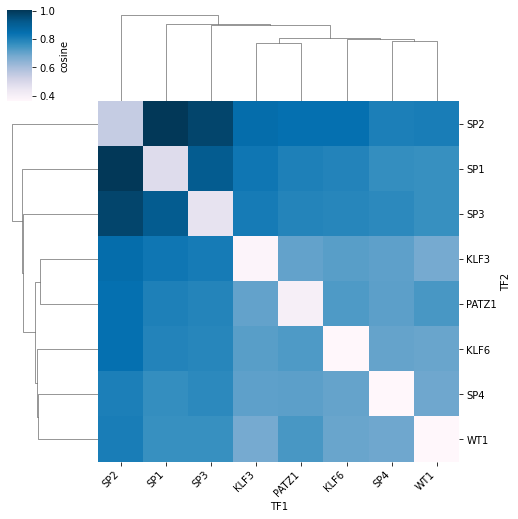

In [7]:
_ = C.plot_heatmap()

/home/stud7/.conda/envs/tfcomb_env/lib/python3.7/site-packages/tfcomb/plotting.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha="right")


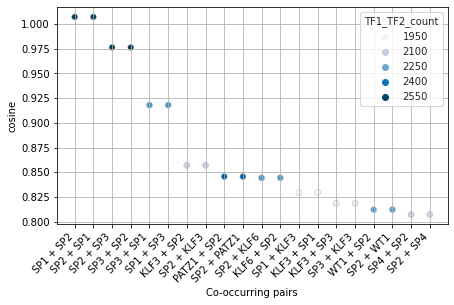

In [8]:
_ = C.plot_bubble()

INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds


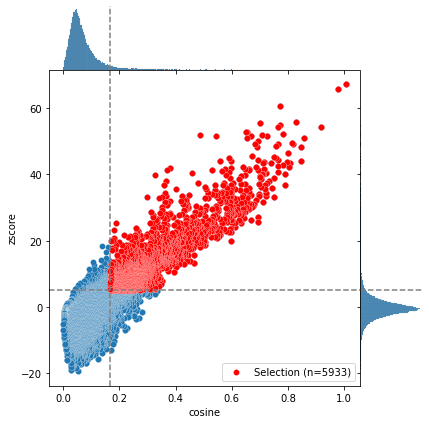

In [9]:
# with increasing number of TF, co-occurence gets lot of rules. here the methode selects rules based on zscore and cosine
selected = C.select_significant_rules()

In [10]:
selected

<CombObj: 198091 TFBS (401 unique names) | Market basket analysis: 5933 rules>

In [11]:
selected.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,2556,2408,2675,1.007096,67.263173
SP2-SP1,SP2,SP1,2556,2675,2408,1.007096,67.263173
SP2-SP3,SP2,SP3,2578,2675,2607,0.976226,65.651467
SP3-SP2,SP3,SP2,2578,2607,2675,0.976226,65.651467
SP3-SP1,SP3,SP1,2300,2607,2408,0.917971,54.188781
...,...,...,...,...,...,...,...
ZNF322-KLF9,ZNF322,KLF9,158,652,1347,0.168597,7.012459
ZNF449-NR1H4,ZNF449,NR1H4,132,747,821,0.168555,6.941992
NR1H4-ZNF449,NR1H4,ZNF449,132,821,747,0.168555,6.941992
E2F7-KLF8,E2F7,KLF8,144,1375,531,0.168525,7.557228


In [12]:
# to get first n rules 

In [21]:
selected2 = C.select_top_rules(n=100)

In [22]:
selected2.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,2556,2408,2675,1.007096,67.263173
SP2-SP1,SP2,SP1,2556,2675,2408,1.007096,67.263173
SP2-SP3,SP2,SP3,2578,2675,2607,0.976226,65.651467
SP3-SP2,SP3,SP2,2578,2607,2675,0.976226,65.651467
SP3-SP1,SP3,SP1,2300,2607,2408,0.917971,54.188781
...,...,...,...,...,...,...,...
KLF3-KLF15,KLF3,KLF15,1855,2206,3143,0.704480,36.184692
KLF6-SP4,KLF6,SP4,1843,2759,2482,0.704285,38.711940
SP4-KLF6,SP4,KLF6,1843,2482,2759,0.704285,38.711940
KLF1-KLF3,KLF1,KLF3,1432,1889,2206,0.701495,39.455587


INFO: Finished! The network is found within <CombObj>.network.


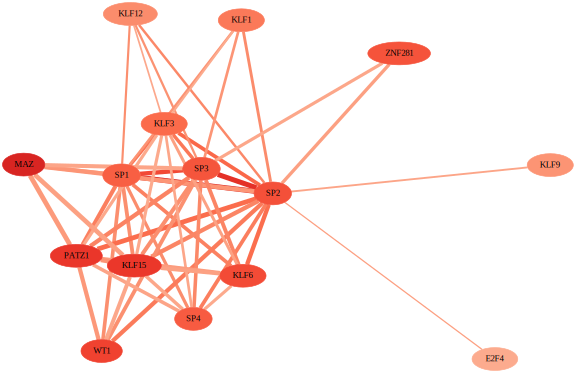

In [23]:
selected2.plot_network()
